# plt를 통해 카메라 동선 따라가기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot_camera(df, game_id):
    df = df.loc[df['game_id']==game_id]
    df = df.loc[df['event']=='Camera']
    df_0 = df.loc[df['player']==0]
    df_1 = df.loc[df['player']==1]

    winner = df['winner'].iloc[0]
    game_time = df['time'].values[-1]
    player_0_species = df_0['species'].iloc[0]
    player_1_species = df_1['species'].iloc[0]
    
    # at (145.25, 21.5078125)과 같은 형태를 145.25, 21.5078125 형태로 변경
    player_0_camera = np.array([item.replace('at (', '').replace(')', '').split(',') for item in df_0['event_contents']]).astype(float)
    player_1_camera = np.array([item.replace('at (', '').replace(')', '').split(',') for item in df_1['event_contents']]).astype(float)
    
    plt.scatter(player_0_camera[:, 0], player_0_camera[:, 1], label='player_0', alpha=0.3, color='b', s=50)
    plt.scatter(player_1_camera[:, 0], player_1_camera[:, 1], label='player_1', alpha=0.3, color='r', s=50)
    plt.legend()
    plt.show()
    
    print('Total game time: %s'%(game_time))
    print('Winner: Player_%i'%(winner))
    print('Player_0: %s'%(player_0_species))
    print('Player_1: %s'%(player_1_species))

In [3]:
train=pd.read_csv('train.csv')

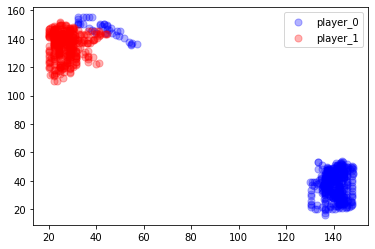

Total game time: 7.24
Winner: Player_1
Player_0: T
Player_1: T


In [9]:
plot_camera(train,0)

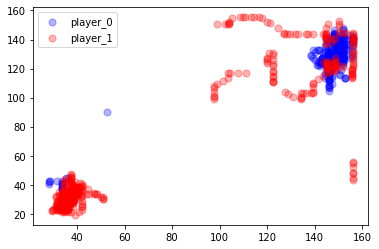

Total game time: 8.06
Winner: Player_1
Player_0: P
Player_1: P


In [10]:
plot_camera(train,100)

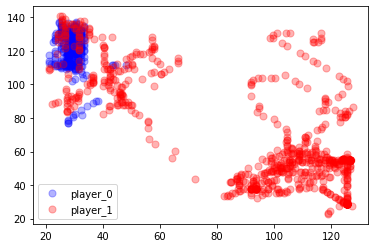

Total game time: 10.34
Winner: Player_1
Player_0: Z
Player_1: Z


In [13]:
plot_camera(train,2000)

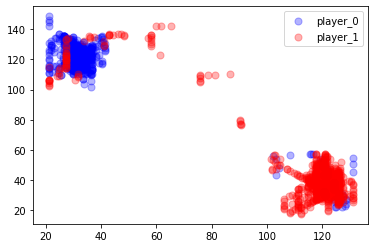

Total game time: 8.01
Winner: Player_0
Player_0: T
Player_1: Z


In [14]:
plot_camera(train,30000)

In [12]:
train.loc[train['game_id']==0].loc[train['event']=='Camera']

,game_id,winner,time,player,species,event,event_contents
0,0,1,0.00,0,T,Camera,"at (145.25, 21.5078125)"
1,0,1,0.00,1,T,Camera,"at (22.75, 147.0078125)"
4,0,1,0.14,0,T,Camera,"at (142.99609375, 24.50390625)"
5,0,1,0.14,0,T,Camera,"at (142.5078125, 24.98828125)"
6,0,1,0.14,0,T,Camera,"at (139.6171875, 27.8828125)"
...,...,...,...,...,...,...,...
1133,0,1,7.22,0,T,Camera,"at (144.36328125, 41.60546875)"
1134,0,1,7.22,0,T,Camera,"at (144.36328125, 42.44921875)"
1135,0,1,7.22,0,T,Camera,"at (144.36328125, 44.93359375)"
1136,0,1,7.22,0,T,Camera,"at (144.36328125, 45.75390625)"
